# 高斯基函数拟合非线性数据

Scikit-learn使用总结
https://www.jianshu.com/p/516f009c0875

参考资料：https://blog.csdn.net/jasonzhoujx/article/details/81879107

## 认识数据

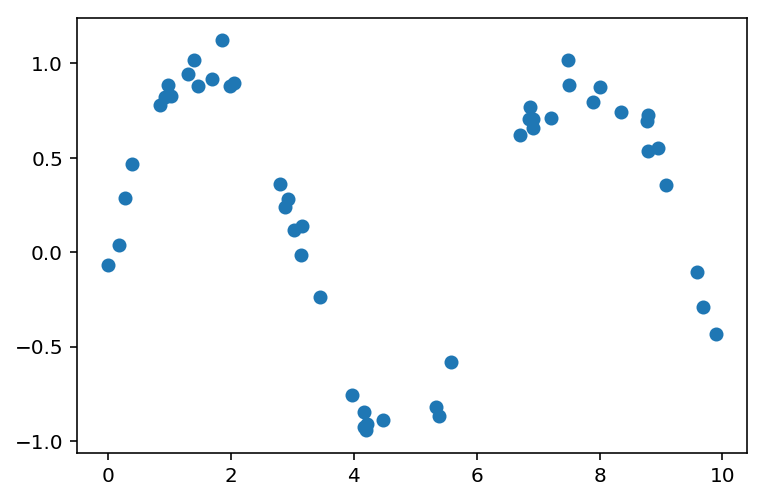

In [7]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x,y)
plt.show()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


class GaussianFeatures(BaseEstimator, TransformerMixin):
    """
    Uniformly spaced Gaussian features for one-dimensional input
    一维输入均匀分布的高斯特征
    """

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg**2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        # 在数据区间中创建 N 个高斯分布中心
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        print(self.centers_)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(
            X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

In [9]:
xfit = np.linspace(0, 10, 1000)

[1.14374817e-03 5.21536756e-01 1.04192976e+00 1.56232277e+00
 2.08271578e+00 2.60310879e+00 3.12350179e+00 3.64389480e+00
 4.16428781e+00 4.68468081e+00 5.20507382e+00 5.72546683e+00
 6.24585984e+00 6.76625284e+00 7.28664585e+00 7.80703886e+00
 8.32743187e+00 8.84782487e+00 9.36821788e+00 9.88861089e+00]


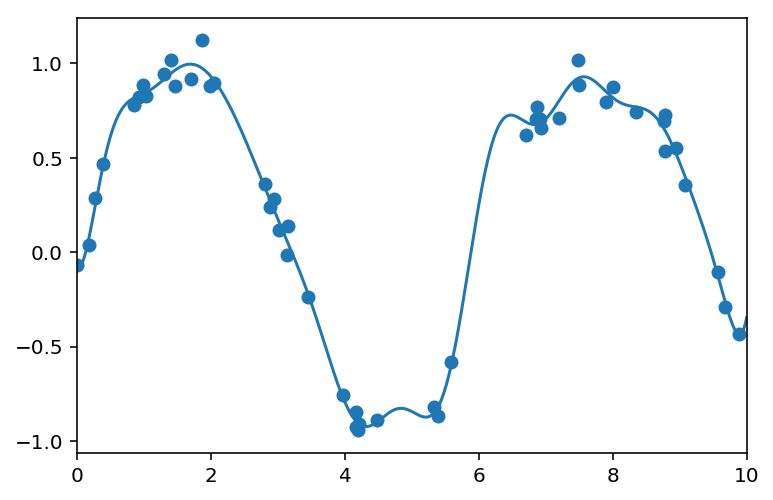

In [10]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);